# 1. Logistic Regression and Overfitting

In [ ]:
import math

def sigmoid(x, w):
  array = []
  for i in x:
    if i >= 0:
      array.append(1/(1+math.exp(-w*i)))
    else:
      array.append(math.exp(w*i)/(1+math.exp(w*i)))
  return array

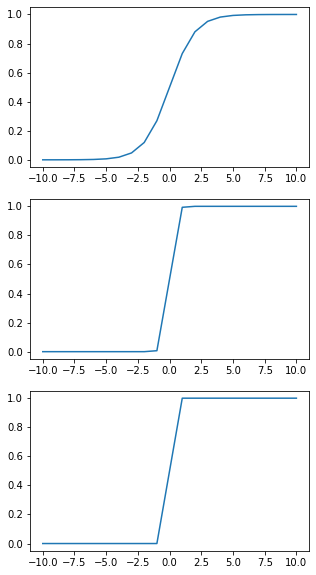

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 11, 1)

s1 = sigmoid(x, 1)
s2 = sigmoid(x, 5)
s3 = sigmoid(x, 100)

figure, axis = plt.subplots(3, figsize=(5, 10))
axis[0].plot(x, s1)
axis[1].plot(x, s2)
axis[2].plot(x, s3)

Για μεγάλες τιμές της παραμέτρου w, υπάρχει μεγαλύτερη εξειδίκευση στα training data με αποτέλεσμα, η παραμικρή "φασαρία"-αλλαγή στα training data να οδηγεί σε μεγάλες διαφορές του output.

Το regularization της παραμέτρου w βοηθάει στην αντιμετώπιση του overfitting.
Στην ουσία γίνεται εφαρμογή επιπρόσθετης πληροφορίας στο w ανάλογα με το μέγεθός του για να γίνει μείωση του βάρους-τιμής w.

Η πιο συνήθης συνάρτηση κανονικοποίησης είναι η L2, όπου L2 = (λ * ||w||^2) / 2, για λ > 0. H L2 προσθέτει ένα επιπλέον όρο στο loss function. Η επιλογή του λ, που είναι η παράμετρος κανονικοποίησης πρέπει να γίνεται με προσοχή αφού μία μεγάλη τιμή του μπορεί να οδηγήσει σε underfitting. Σκοπός της L2 είναι το minimization της loss function με όσο μικρότερα βάρη w γίνεται.


# 2. Ridge Regression

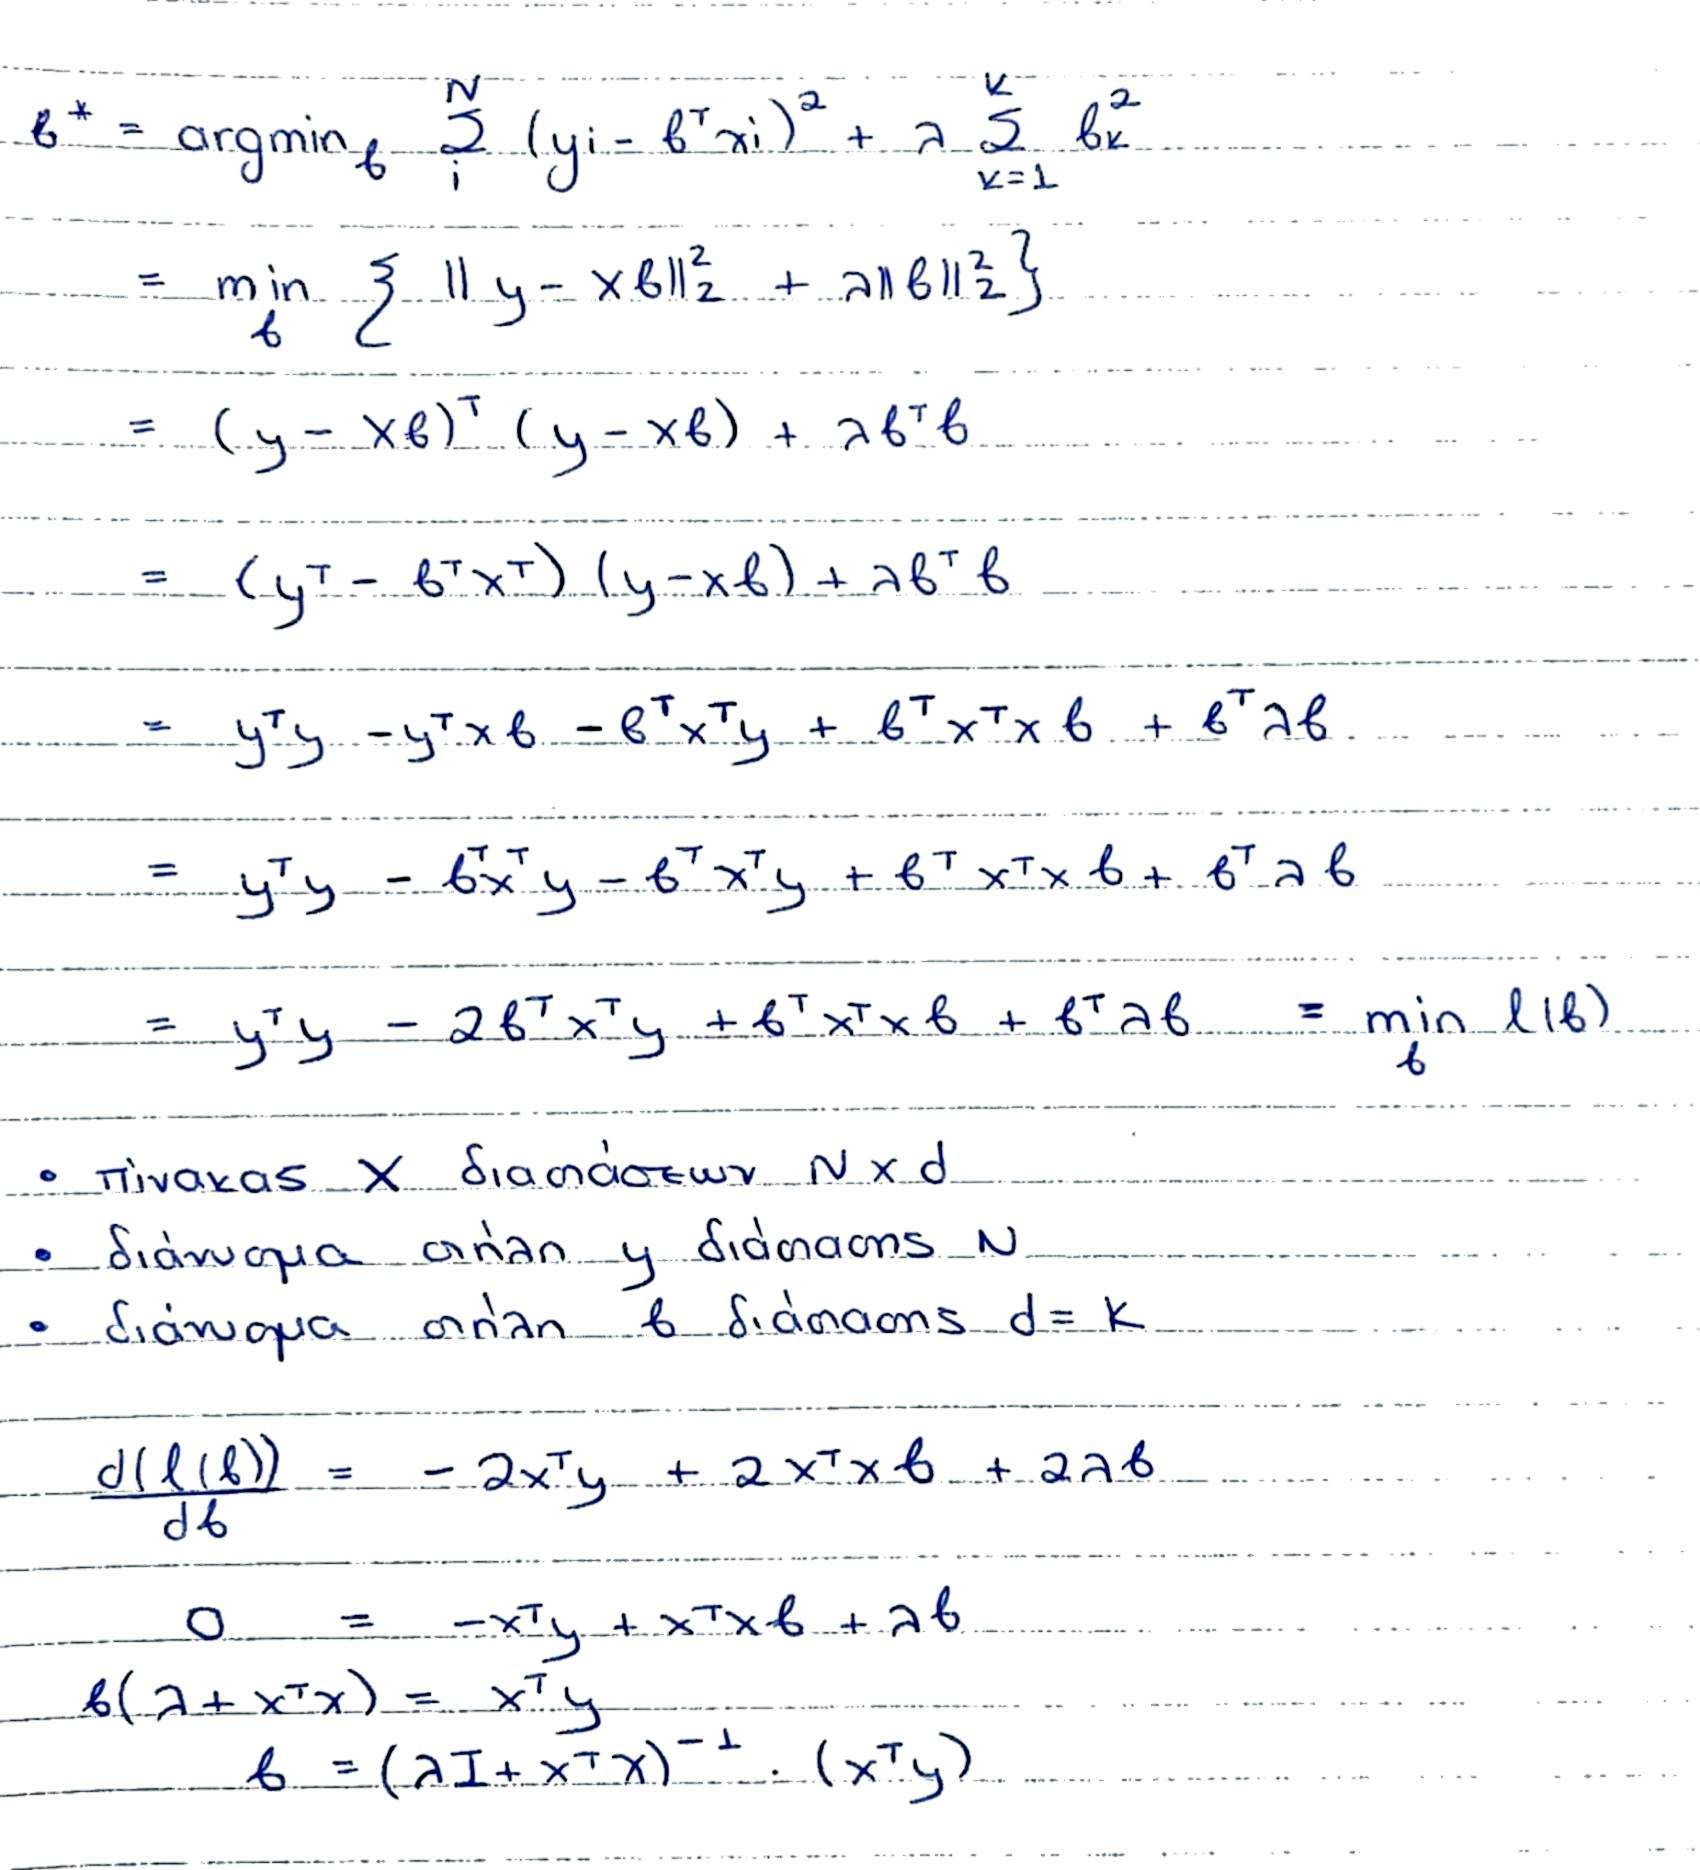

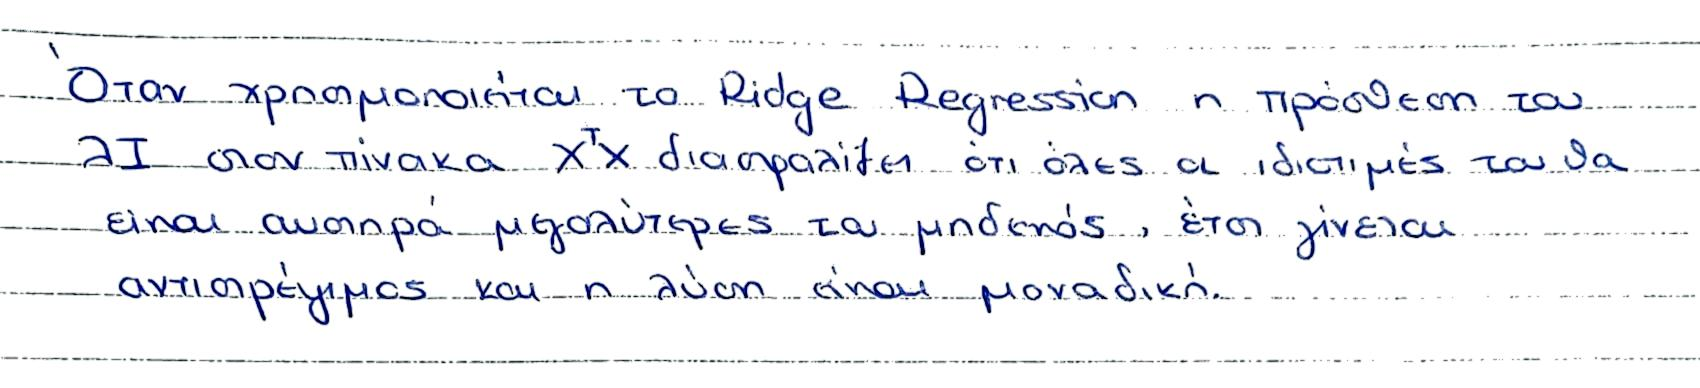

# 3. Face Recognition

In [ ]:
from PIL import Image
import numpy as np 
import glob
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pylab import plt
import random

##Vectorization of Images

In [ ]:
def loadImages(path, set_number):
  img_list = glob.glob(path)

  set1 = ['_01', '_02', '_03', '_04', '_05', '_06', '_07']
  set2 = ['_08', '_09', '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19']
  set3 = ['_20', '_21', '_22', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_30', '_31']
  set4 = ['_32', '_33', '_34', '_35', '_36', '_37', '_38', '_39', '_40', '_41', '_42', '_43', '_44', '_45']
  set5 = ['_46', '_47', '_48', '_49', '_50', '_51', '_52', '_53', '_54', '_55', '_56', '_57', '_58', '_59', '_60', '_61', '_62', '_63', '_64']

  images = []
  for i in img_list:
    if(set_number == 'Set_1'):
        for j in set1:
          if (i.find(j) != -1):
            images.append(i)
    elif(set_number == 'Set_2'):
      for j in set2:
          if (i.find(j) != -1):
            images.append(i)
    elif(set_number == 'Set_3'):
      for j in set3:
          if (i.find(j) != -1):
            images.append(i)
    elif(set_number == 'Set_4'):
      for j in set4:
          if (i.find(j) != -1):
            images.append(i)
    elif(set_number == 'Set_5'):
      for j in set5:
          if (i.find(j) != -1):
            images.append(i)

  img_vec = []
  labels = []
  for img in images:
    image = Image.open(img)
    image_v = np.asarray(image)
    image_v = image_v.reshape(2500)
    image_v = (image_v - np.mean(image_v)) / np.std(image_v)
    img_vec.append(image_v)

    if(img.find('person01_') != -1):
      labels.append(1)
    elif(img.find('person02_') != -1):
      labels.append(2)
    elif(img.find('person03_') != -1):
      labels.append(3)
    elif(img.find('person04_') != -1):
      labels.append(4)
    elif(img.find('person05_') != -1):
      labels.append(5)
    elif(img.find('person06_') != -1):
      labels.append(6)
    elif(img.find('person07_') != -1):
      labels.append(7)
    elif(img.find('person08_') != -1):
      labels.append(8)
    elif(img.find('person09_') != -1):
      labels.append(9)
    else:
      labels.append(10)
  
  return(img_vec, labels)

## 9 Principal Components

In [ ]:
path = './drive/MyDrive/faces/*.*'

In [ ]:
X, y = loadImages(path, 'Set_1')
X = np.array(X)
y = np.array(y)

pca_9 = PCA(n_components=9)
X_train9 = pca_9.fit_transform(X)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train9, y)

print("Accuracy of Set_1: ", clf.score(X_train9, y))

Accuracy of Set_1:  1.0


In [ ]:
X2, y2 = loadImages(path, 'Set_2')
X2 = np.array(X2)
y2 = np.array(y2)

X_test9_2 = pca_9.transform(X2)

print("Accuracy of Set_2: ",clf.score(X_test9_2, y2))

Accuracy of Set_2:  1.0


In [ ]:
X3, y3 = loadImages(path, 'Set_3')
X3 = np.array(X3)
y3 = np.array(y3)

X_test9_3 = pca_9.transform(X3)

print("Accuracy of Set_3: ",clf.score(X_test9_3, y3))

Accuracy of Set_3:  0.775


In [ ]:
X4, y4 = loadImages(path, 'Set_4')
X4 = np.array(X4)
y4 = np.array(y4)

X_test9_4 = pca_9.transform(X4)

print("Accuracy of Set_4: ",clf.score(X_test9_4, y4))

Accuracy of Set_4:  0.3357142857142857


In [ ]:
X5, y5 = loadImages(path, 'Set_5')
X5 = np.array(X5)
y5 = np.array(y5)

X_test9_5 = pca_9.transform(X5)

print("Accuracy of Set_5: ",clf.score(X_test9_5, y5))

Accuracy of Set_5:  0.14210526315789473


## 30 Principal Components

In [ ]:
pca_30 = PCA(n_components=30)
X_train30 = pca_30.fit_transform(X)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train30, y)

print("Accuracy of Set_1: ",clf.score(X_train30, y))

Accuracy of Set_1:  1.0


In [ ]:
X_test30_2 = pca_30.transform(X2)

print("Accuracy of Set_2: ",clf.score(X_test30_2, y2))

Accuracy of Set_2:  1.0


In [ ]:
X_test30_3 = pca_30.transform(X3)

print("Accuracy of Set_3: ",clf.score(X_test30_3, y3))

Accuracy of Set_3:  0.9583333333333334


In [ ]:
X_test30_4 = pca_30.transform(X4)

print("Accuracy of Set_4: ",clf.score(X_test30_4, y4))

Accuracy of Set_4:  0.4357142857142857


In [ ]:
X_test30_5 = pca_30.transform(X5)

print("Accuracy of Set_5: ",clf.score(X_test30_5, y5))

Accuracy of Set_5:  0.22631578947368422


## 9 Top Eigenvectors

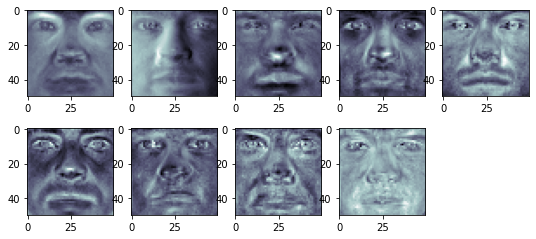

In [ ]:
plt.figure(figsize=(9, 4))
for i in range(0, 9):
  plt.subplot(2, 5, i+1)
  plt.imshow(pca_9.components_[i].reshape(50,50), cmap='bone')

## Original to Reconstructed Image


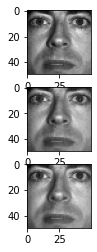

In [ ]:
random.seed(150)
i = random.randint(0, 70)

projected9_1 = pca_9.inverse_transform(X_train9)
projected30_1 = pca_30.inverse_transform(X_train30)

plt.figure(figsize=(9, 4))
plt.subplot(3, 1, 1)
plt.imshow(X[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 2)
plt.imshow(projected30_1[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 3)
plt.imshow(projected9_1[i].reshape(50, 50), cmap='binary_r')

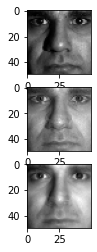

In [ ]:
random.seed(151)
i = random.randint(0, 120)

projected9_2 = pca_9.inverse_transform(X_test9_2)
projected30_2 = pca_30.inverse_transform(X_test30_2)

plt.figure(figsize=(9, 4))
plt.subplot(3, 1, 1)
plt.imshow(X2[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 2)
plt.imshow(projected30_2[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 3)
plt.imshow(projected9_2[i].reshape(50, 50), cmap='binary_r')

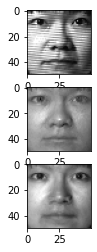

In [ ]:
random.seed(251)
i = random.randint(0, 120)

projected9_3 = pca_9.inverse_transform(X_test9_3)
projected30_3 = pca_30.inverse_transform(X_test30_3)

plt.figure(figsize=(9, 4))
plt.subplot(3, 1, 1)
plt.imshow(X3[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 2)
plt.imshow(projected30_3[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 3)
plt.imshow(projected9_3[i].reshape(50, 50), cmap='binary_r')

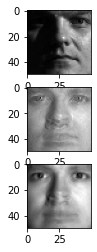

In [ ]:
random.seed(351)
i = random.randint(0, 140)

projected9_4 = pca_9.inverse_transform(X_test9_4)
projected30_4 = pca_30.inverse_transform(X_test30_4)

plt.figure(figsize=(9, 4))
plt.subplot(3, 1, 1)
plt.imshow(X4[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 2)
plt.imshow(projected30_4[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 3)
plt.imshow(projected9_4[i].reshape(50, 50), cmap='binary_r')

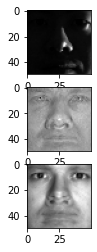

In [ ]:
random.seed(451)
i = random.randint(0, 190)

projected9_5 = pca_9.inverse_transform(X_test9_5)
projected30_5 = pca_30.inverse_transform(X_test30_5)

plt.figure(figsize=(9, 4))
plt.subplot(3, 1, 1)
plt.imshow(X5[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 2)
plt.imshow(projected30_5[i].reshape(50, 50), cmap='binary_r')
plt.subplot(3, 1, 3)
plt.imshow(projected9_5[i].reshape(50, 50), cmap='binary_r')

Βλέπουμε ότι ο αριθμός των components παίζει ρόλο στην ποιότητα της εικόνας. Όσο μεγαλύτερο είναι το d τόσο "καλύτερή" είναι η ανακατασκευή της εικόνας. Μια καλή ανακατασκευή θεωρούμε ότι είναι αυτή που παρέχει τη μεγαλύτερη δυνατή λεπτομέρεια, επομένως καλύτερη ποιότητα.

## SVD

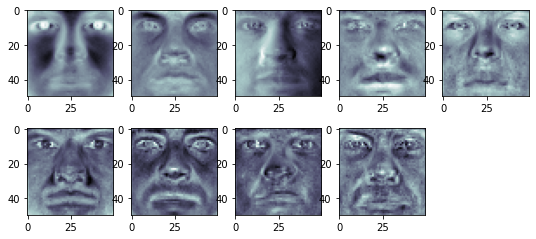

In [ ]:
U, s, V = np.linalg.svd(X)

plt.figure(figsize=(9,4))
for i in range(0, 9):
   plt.subplot(2, 5, i+1)
   plt.imshow(V[i].reshape(50,50), cmap='bone')

Τα singular vectors διαφέρουν από τα ιδιοδιανύσματα. Τα ιδιοδιανύσματα περιγράφουν τις κατευθύνσεις του νέου χώρου χαρακτηριστικών, ενώ τα ιδιάζοντα διανύσματα περιγράφουν τις κατευθύνσεις του αρχικού χώρου χαρακτηριστικών.